# Task 1: Architecture. Experiment with the layers and their parameters.

After the first session of this seminar, in this section different layers and parameters will be used to experiment and show how different results work.

## Example 1 : Evolution at each epoch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
from keras.utils import np_utils

# inline plots
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

Load the MNIST data, shuffled and split between train and test sets. Additionally, we are going to take 10% of the entire training set as the validation set and leave the remaining 90% as the training set.

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_validation = int(X_train.shape[0] * 0.1)
num_training = X_train.shape[0] - num_validation

mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

print 'X_train: ', X_train.shape
print 'y_train: ', y_train.shape
print 'X_val: ', X_val.shape
print 'y_val: ', y_val.shape
print 'X_test: ', X_test.shape
print 'y_test: ', y_test.shape

Results of the different prints:
X_train:  (54000L, 28L, 28L)
y_train:  (54000L,)
X_val:  (6000L, 28L, 28L)
y_val:  (6000L,)
X_test:  (10000L, 28L, 28L)
y_test:  (10000L,)


### Fully Connected Neural Network

We need to reshape the images into vectors, convert the pixel values to float numbers and divide by 255 so that the values are between 0 and 1.


In [ ]:
X_train_fc = X_train.reshape(X_train.shape[0], -1).astype('float32') / 255
X_val_fc = X_val.reshape(X_val.shape[0], -1).astype('float32') / 255
X_test_fc = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255

We also need to convert the class labels to binary vectors. See below a couple of examples of what this means.
In [4]:

nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_val = np_utils.to_categorical(y_val, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print 'Class label: {0} -> Binary vector: {1}'.format(y_train[0], Y_train[0])
print 'Class label: {0} -> Binary vector: {1}'.format(y_train[1], Y_train[1])

Class label: 5 -> Binary vector: [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
Class label: 0 -> Binary vector: [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

First let's try with a simple architecture consisting of two fully connected layers with 32 neurons followed by relu activations, and a third fully connected layer with 10 neurons followed by a softmax function to produce the class scores.

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=X_train_fc.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
          
model.summary()

Layer (type)                     Output Shape          Param #     Connected to                     
===============================================================
dense_1 (Dense)                  (None, 32)            25120       dense_input_1[0][0]              
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 32)            1056        dense_1[0][0]                    
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 10)            330         dense_2[0][0]                    
===============================================================
Total params: 26506
____________________________________________________________________________________________________

As we can see, this model has 26506 parameters in total. For each layer, the number of parameters is given by the following formula: (input_dim * output_dim) + output_dim. This is because each neuron is connected to all the input values and has one more weight that accounts for the bias.

Next, we are going to train this model and visualise the learning curves.


In [ ]:
# hyperparameters
lr = 0.1
momemtum = 0.9
batch_size = 128
nb_epoch = 20

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=lr, momentum=momemtum),
              metrics=['accuracy'])

checkpoint_file = 'fc_weights.hdf5'
checkpointer = ModelCheckpoint(filepath=checkpoint_file, verbose=0, save_best_only=True)
history = model.fit(X_train_fc, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_val_fc, Y_val),
                    callbacks=[checkpointer])

plt.subplot(2, 1, 1)
plt.title('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'], '-o', label='Training loss')
plt.plot(history.history['val_loss'], '-o', label='Validation loss')
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.plot(history.history['acc'], '-o', label='Training accuracy')
plt.plot(history.history['val_acc'], '-o', label='Validation accuracy')
plt.legend(loc='lower right')
plt.show()

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 1s - loss: 0.3591 - acc: 0.8878 - val_loss: 0.1442 - val_acc: 0.9542
Epoch 2/20
54000/54000 [==============================] - 1s - loss: 0.1839 - acc: 0.9445 - val_loss: 0.1425 - val_acc: 0.9615
Epoch 3/20
54000/54000 [==============================] - 1s - loss: 0.1570 - acc: 0.9524 - val_loss: 0.1263 - val_acc: 0.9642
Epoch 4/20
54000/54000 [==============================] - 1s - loss: 0.1317 - acc: 0.9610 - val_loss: 0.1215 - val_acc: 0.9660
Epoch 5/20
54000/54000 [==============================] - 1s - loss: 0.1206 - acc: 0.9636 - val_loss: 0.1306 - val_acc: 0.9667
Epoch 6/20
54000/54000 [==============================] - 1s - loss: 0.1109 - acc: 0.9663 - val_loss: 0.1228 - val_acc: 0.9655
Epoch 7/20
54000/54000 [==============================] - 1s - loss: 0.1012 - acc: 0.9693 - val_loss: 0.1211 - val_acc: 0.9670
Epoch 8/20
54000/54000 [==============================] - 2s - loss: 0.0956 - acc: 0.9715 - val_loss: 0.1090 - val_acc: 0.9688
Epoch 9/20
54000/54000 [==============================] - 2s - loss: 0.0959 - acc: 0.9703 - val_loss: 0.1064 - val_acc: 0.9720
Epoch 10/20
54000/54000 [==============================] - 2s - loss: 0.0938 - acc: 0.9717 - val_loss: 0.1188 - val_acc: 0.9695
Epoch 11/20
54000/54000 [==============================] - 2s - loss: 0.0858 - acc: 0.9741 - val_loss: 0.1207 - val_acc: 0.9677
Epoch 12/20
54000/54000 [==============================] - 2s - loss: 0.0808 - acc: 0.9755 - val_loss: 0.1310 - val_acc: 0.9640
Epoch 13/20
54000/54000 [==============================] - 2s - loss: 0.0788 - acc: 0.9760 - val_loss: 0.1278 - val_acc: 0.9667
Epoch 14/20
54000/54000 [==============================] - 2s - loss: 0.0728 - acc: 0.9777 - val_loss: 0.1128 - val_acc: 0.9707
Epoch 15/20
54000/54000 [==============================] - 2s - loss: 0.0740 - acc: 0.9774 - val_loss: 0.1330 - val_acc: 0.9673
Epoch 16/20
54000/54000 [==============================] - 2s - loss: 0.0717 - acc: 0.9777 - val_loss: 0.1629 - val_acc: 0.9607
Epoch 17/20
54000/54000 [==============================] - 2s - loss: 0.0732 - acc: 0.9778 - val_loss: 0.1488 - val_acc: 0.9580
Epoch 18/20
54000/54000 [==============================] - 2s - loss: 0.0684 - acc: 0.9788 - val_loss: 0.1186 - val_acc: 0.9692
Epoch 19/20
54000/54000 [==============================] - 2s - loss: 0.0655 - acc: 0.9799 - val_loss: 0.1130 - val_acc: 0.9717
Epoch 20/20
54000/54000 [==============================] - 2s - loss: 0.0630 - acc: 0.9806 - val_loss: 0.1267 - val_acc: 0.9700

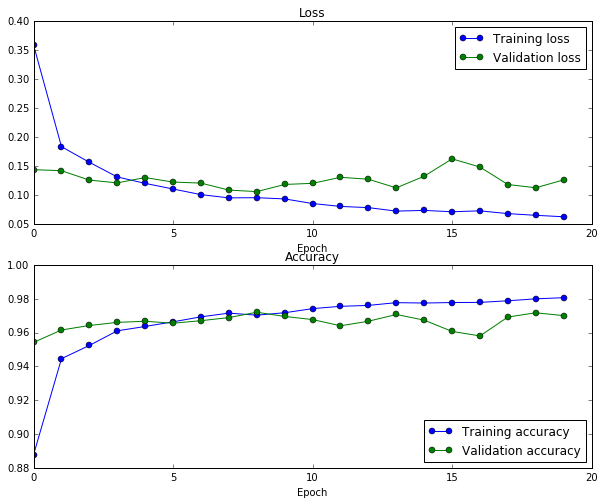

In [10]:
from IPython.display import Image
#Image("home/eva/Escritorio/task1.png")

PATH = "plots/"
Image(filename = PATH + "task1.png", width=5000, height=5000)

Since we are using checkpointing, we can take the model that performs best on the validation set and evaluate it on the test set.

In [ ]:
print 'Best model in the validation set: ', np.argmax(history.history['val_acc']) + 1

model.load_weights(checkpoint_file)

score = model.evaluate(X_val_fc, Y_val, verbose=0)
print 'Val loss:', score[0]
print 'Val accuracy:', score[1]

score = model.evaluate(X_test_fc, Y_test, verbose=0)
print 'Test loss:', score[0]
print 'Test accuracy:', score[1]

Best model in the validation set:  9
Val loss: 0.106403066085
Val accuracy: 0.972
Test loss: 0.124628911183
Test accuracy: 0.9645
--------------------------------------------------------------------------------

## Example 2 : CNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

# inline plots
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

Load the MNIST data, shuffled and split between train and test sets. Additionally, we are going to take 10% of the entire training set as the validation set and leave the remaining 90% as the training set.

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

batch_size = 128
nb_classes = 10
nb_epoch = 10

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

#### Convolutional Neural Network

We need to reshape the images into vectors, convert the pixel values to float numbers and divide by 255 so that the values are between 0 and 1.

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


('X_train shape:', (60000, 1, 28, 28))
(60000, 'train samples')
(10000, 'test samples')

We also need to convert the class labels to binary vectors. See below a couple of examples of what this means.

In [ ]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

First let's try with a simple architecture consisting of two fully connected layers with 32 neurons followed by relu activations, and a third fully connected layer with 10 neurons followed by a softmax function to produce the class scores.

In [ ]:
model = Sequential()

model.add(Convolution2D(32, nb_conv, nb_conv,
                        border_mode='valid',
                        activation='relu',
                        input_shape=(1, img_rows, img_cols),
                        name='conv1_1'))
model.add(Convolution2D(32, nb_conv, nb_conv, activation='relu', name='conv1_2'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool), name='pool1'))
model.add(Convolution2D(64, nb_conv, nb_conv, activation='relu', name='conv2'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool), name='pool2'))

model.add(Flatten())
model.add(Dense(128, activation='relu', name='fc1'))
model.add(Dense(nb_classes, activation='softmax', name='output'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.summary()

Layer (type)                       Output Shape        Param #     Connected to                     
===============================================================================
conv1_1 (Convolution2D)            (None, 32, 26, 26)  320         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
conv1_2 (Convolution2D)            (None, 32, 24, 24)  9248        conv1_1[0][0]                    
____________________________________________________________________________________________________
pool1 (MaxPooling2D)               (None, 32, 12, 12)  0           conv1_2[0][0]                    
____________________________________________________________________________________________________
conv2 (Convolution2D)              (None, 64, 10, 10)  18496       pool1[0][0]                      
____________________________________________________________________________________________________
pool2 (MaxPooling2D)               (None, 64, 5, 5)    0           conv2[0][0]                      
____________________________________________________________________________________________________
flatten_1 (Flatten)                (None, 1600)        0           pool2[0][0]                      
____________________________________________________________________________________________________
fc1 (Dense)                        (None, 128)         204928      flatten_1[0][0]                  
____________________________________________________________________________________________________
output (Dense)                     (None, 10)          1290        fc1[0][0]                        
==========================
Total params: 234282
____________________________________________________________________________________________________


In [ ]:
callbacks = [
    ModelCheckpoint('./weights.hdf5', save_best_only=True),
    EarlyStopping(patience=1)
]

history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test), callbacks=callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 311s - loss: 0.1627 - acc: 0.9483 - val_loss: 0.0557 - val_acc: 0.9820
Epoch 2/10
60000/60000 [==============================] - 309s - loss: 0.0385 - acc: 0.9885 - val_loss: 0.0335 - val_acc: 0.9888
Epoch 3/10
60000/60000 [==============================] - 288s - loss: 0.0248 - acc: 0.9924 - val_loss: 0.0321 - val_acc: 0.9889
Epoch 4/10
60000/60000 [==============================] - 335s - loss: 0.0181 - acc: 0.9943 - val_loss: 0.0315 - val_acc: 0.9907
Epoch 5/10
60000/60000 [==============================] - 343s - loss: 0.0127 - acc: 0.9960 - val_loss: 0.0210 - val_acc: 0.9941
Epoch 6/10
60000/60000 [==============================] - 344s - loss: 0.0083 - acc: 0.9976 - val_loss: 0.0274 - val_acc: 0.9923
Epoch 7/10
60000/60000 [==============================] - 317s - loss: 0.0066 - acc: 0.9981 - val_loss: 0.0270 - val_acc: 0.9927


In [ ]:
plt.subplot(2, 1, 1)
plt.title('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'], '-o', label='Training loss')
plt.plot(history.history['val_loss'], '-o', label='Validation loss')
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.plot(history.history['acc'], '-o', label='Training accuracy')
plt.plot(history.history['val_acc'], '-o', label='Validation accuracy')
plt.legend(loc='lower right')
plt.show()

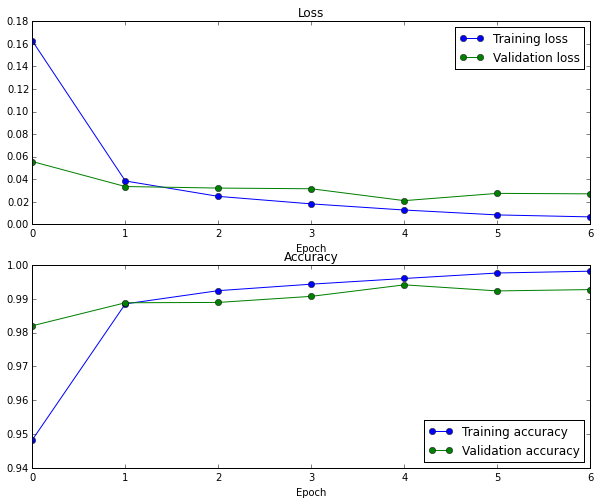

In [12]:
from IPython.display import Image
PATH = "plots/"
Image(filename = PATH + "task2.png", width=500, height=500)

Since we are using checkpointing, we can take the model that performs best on the validation set and evaluate it on the test set.

In [ ]:
plt.imshow(X_train[0][0], cmap='gray')

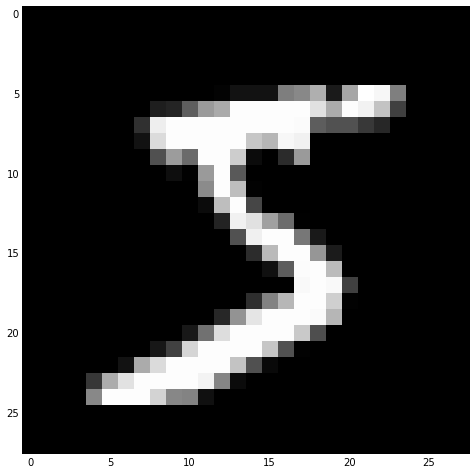

In [16]:
from IPython.display import Image
PATH = "plots/"
Image(filename = PATH + "task4.png", width=500, height=500)

In [ ]:
filters = model.layers[0].get_weights()[0]
print filters.shape

(32, 1, 3, 3)

In [ ]:
import numpy as np
filters = filters.reshape(4, 8, 3, 3)

f, axarr = plt.subplots(4, 8)
for i in range(4):
    for j in range(8):
        axarr[i, j].imshow(filters[i,j], cmap='gray')
        axarr[i,j].get_xaxis().set_visible(False)
        axarr[i,j].get_yaxis().set_visible(False)

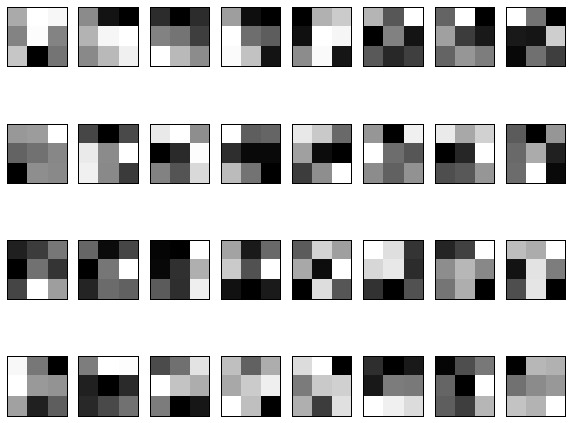

In [17]:
from IPython.display import Image
PATH = "plots/"
Image(filename = PATH + "task5.png", width=500, height=500)

In [ ]:
from keras import backend as K

get_1st_layer_output = K.function([model.layers[0].input],
                                  [model.layers[0].output])
get_2nd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])
get_4th_layer_output = K.function([model.layers[0].input],
                                  [model.layers[3].output])
output = []
output.append(get_1st_layer_output([X_test[:1]])[0])
output.append(get_2nd_layer_output([X_test[:1]])[0])
output.append(get_4th_layer_output([X_test[:1]])[0])

Conv layer 1
(1, 32, 26, 26)

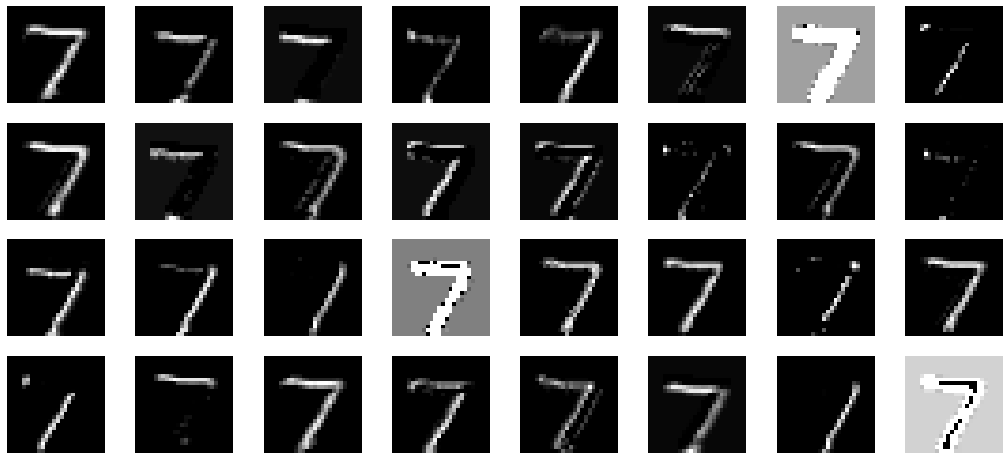

In [19]:
from IPython.display import Image
PATH = "plots/"
Image(filename = PATH + "task6.png", width=1000, height=1000)

Conv layer 2
(1, 32, 24, 24)

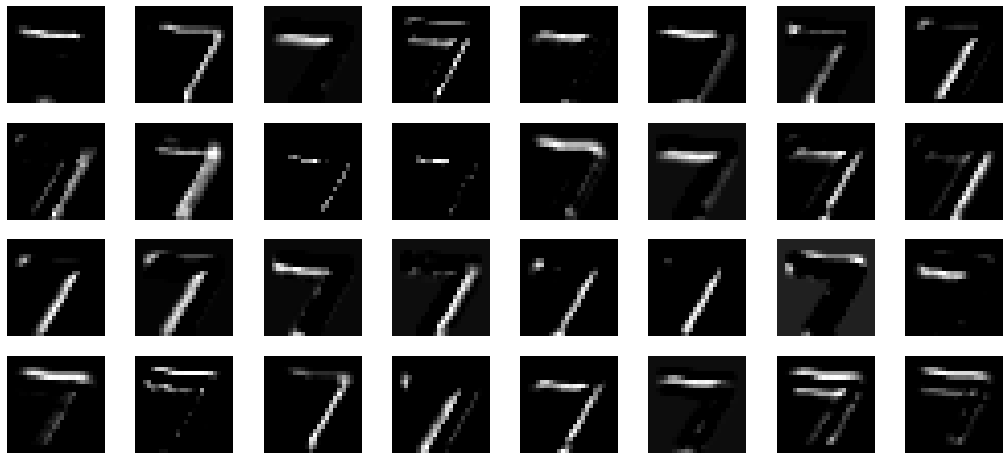

In [21]:
from IPython.display import Image
PATH = "plots/"
Image(filename = PATH + "task7.png", width=1000, height=1000)

Conv layer 3
(1, 64, 10, 10)

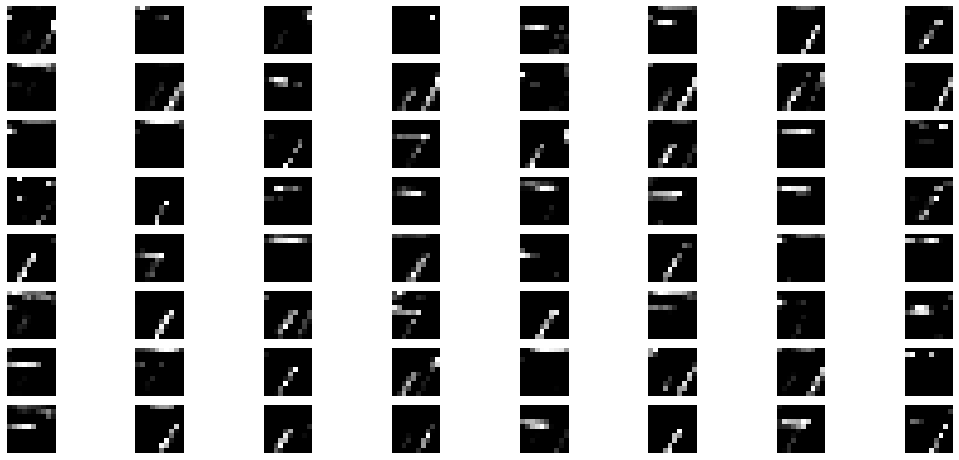

In [1]:
from IPython.display import Image
PATH = "plots/"
Image(filename = PATH + "task8.png", width=1000, height=1000)

## T-SNE

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
from keras import backend as K

get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[6].output])
layer_output = get_3rd_layer_output([X_test])[0]
assert layer_output.shape[-1] == 128

layer_output.shape  # Note: the output is (10000, 128)
X = layer_output[:3000,:]
model_tsne = TSNE(n_components=2, random_state=0)
Y = model_tsne.fit_transform(X)

In [ ]:
import pandas as pd
import seaborn as sns

data = {"x": [], "y": [], "cluster": []}
for i in range(len(X)):
    data["x"].append(Y[i][0])
    data["y"].append(Y[i][1])
    data["cluster"].append(y_test[i])
df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df,
           fit_reg=False, size=7,
           hue="cluster", legend=True)
plt.show()

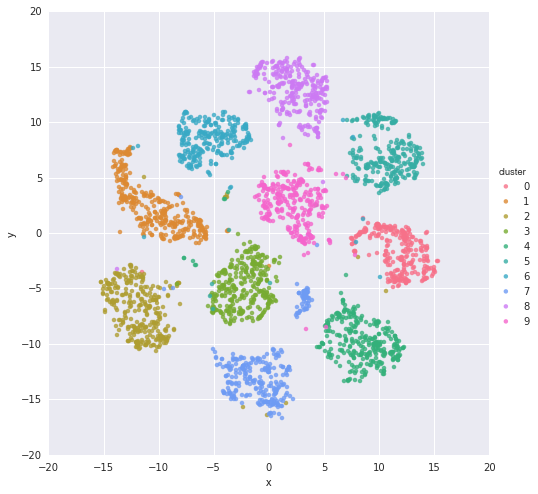

In [5]:
from IPython.display import Image
PATH = "plots/"
Image(filename = PATH + "t1_e2_p1.png", width=600, height=600)

In [ ]:
Y_pred = model.predict_classes(X_test)

data = {"x": [], "y": [], "cluster": []}
for i in range(len(X)):
    data["x"].append(Y[i][0])
    data["y"].append(Y[i][1])
    data["cluster"].append(Y_pred[i])
df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df,
           fit_reg=False, size=7,
           hue="cluster", legend=True)
plt.show()

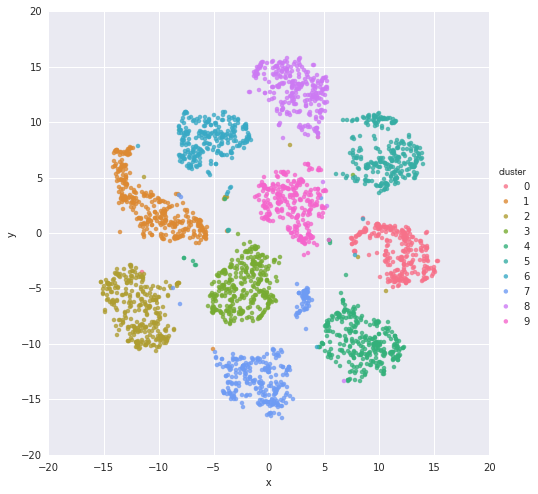

In [6]:
from IPython.display import Image
PATH = "plots/"
Image(filename = PATH + "t1_e2_p2.png", width=600, height=600)

## Example 3 : CNN with random noise

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

# inline plots
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

batch_size = 128
nb_classes = 10
nb_epoch = 10

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

Add random noise

In [ ]:
std = .2
gaussian_noise_train = np.random.normal(0,std,X_train.shape)
gaussian_noise_test = np.random.normal(0,std,X_test.shape)

X_train_noise = X_train - gaussian_noise_train

f, axarr = plt.subplots(4, 2)
for i in range(4):
    axarr[i,0].imshow(X_train[i])
    axarr[i,1].imshow(X_train_noise[i])

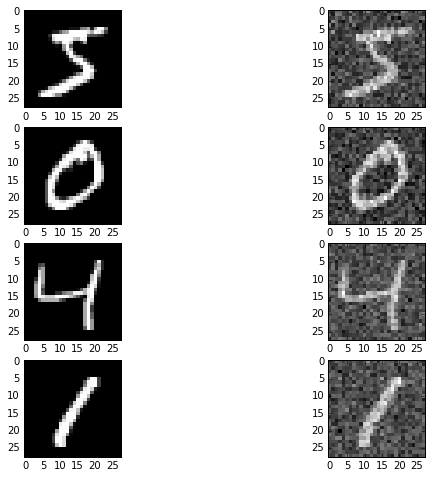

In [9]:
from IPython.display import Image
PATH = "plots/"
Image(filename = PATH + "t1_e3_p1.png", width=500, height=500)

### Convolutional Neural Network

We need to reshape the images into vectors, convert the pixel values to float numbers and divide by 255 so that the values are between 0 and 1.

In [ ]:
X_train_noise = X_train_noise.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test_noise = X_test_noise.reshape(X_test.shape[0], 1, img_rows, img_cols)
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
print('X_train shape:', X_train_noise.shape)
print(X_train_noise.shape[0], 'train samples')
print(X_test_noise.shape[0], 'test samples')

X_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples

We also need to convert the class labels to binary vectors. See below a couple of examples of what this means.

In [ ]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

First let's try with a simple architecture consisting of two fully connected layers with 32 neurons followed by relu activations, and a third fully connected layer with 10 neurons followed by a softmax function to produce the class scores.

In [ ]:
model = Sequential()

model.add(Convolution2D(32, nb_conv, nb_conv,
                        border_mode='valid',
                        activation='relu',
                        input_shape=(1, img_rows, img_cols),
                        name='conv1_1'))
model.add(Convolution2D(32, nb_conv, nb_conv, activation='relu', name='conv1_2'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool), name='pool1'))
model.add(Convolution2D(64, nb_conv, nb_conv, activation='relu', name='conv2'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool), name='pool2'))

model.add(Flatten())
model.add(Dense(128, activation='relu', name='fc1'))
model.add(Dense(nb_classes, activation='softmax', name='output'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.summary()

Layer (type)                     Output Shape          Param #     Connected to     
========================================================================================
conv1_1 (Convolution2D)          (None, 32, 26, 26)    320         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
conv1_2 (Convolution2D)          (None, 32, 24, 24)    9248        conv1_1[0][0]                    
____________________________________________________________________________________________________
pool1 (MaxPooling2D)             (None, 32, 12, 12)    0           conv1_2[0][0]                    
____________________________________________________________________________________________________
conv2 (Convolution2D)            (None, 64, 10, 10)    18496       pool1[0][0]                      
____________________________________________________________________________________________________
pool2 (MaxPooling2D)             (None, 64, 5, 5)      0           conv2[0][0]                      
____________________________________________________________________________________________________
flatten_1 (Flatten)              (None, 1600)          0           pool2[0][0]                      
____________________________________________________________________________________________________
fc1 (Dense)                      (None, 128)           204928      flatten_1[0][0]                  
____________________________________________________________________________________________________
output (Dense)                   (None, 10)            1290        fc1[0][0]                        
=============================================================================================
Total params: 234282
_______________________

In [ ]:
callbacks = [
    ModelCheckpoint('./weights_noise.hdf5', save_best_only=True),
    EarlyStopping(patience=1)
]

history = model.fit(X_train_noise, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test_noise, Y_test), callbacks=callbacks)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 518s - loss: 0.2931 - acc: 0.9086 - val_loss: 0.0756 - val_acc: 0.9761
Epoch 2/10
60000/60000 [==============================] - 498s - loss: 0.0677 - acc: 0.9792 - val_loss: 0.0576 - val_acc: 0.9810
Epoch 3/10
60000/60000 [==============================] - 488s - loss: 0.0482 - acc: 0.9851 - val_loss: 0.0416 - val_acc: 0.9859
Epoch 4/10
60000/60000 [==============================] - 480s - loss: 0.0378 - acc: 0.9886 - val_loss: 0.0401 - val_acc: 0.9867
Epoch 5/10
60000/60000 [==============================] - 563s - loss: 0.0298 - acc: 0.9908 - val_loss: 0.0386 - val_acc: 0.9877
Epoch 6/10
60000/60000 [==============================] - 580s - loss: 0.0241 - acc: 0.9925 - val_loss: 0.0360 - val_acc: 0.9882
Epoch 7/10
60000/60000 [==============================] - 544s - loss: 0.0196 - acc: 0.9939 - val_loss: 0.0340 - val_acc: 0.9886
Epoch 8/10
60000/60000 [==============================] - 550s - loss: 0.0159 - acc: 0.9950 - val_loss: 0.0330 - val_acc: 0.9888
Epoch 9/10
60000/60000 [==============================] - 576s - loss: 0.0131 - acc: 0.9962 - val_loss: 0.0334 - val_acc: 0.9895
Epoch 10/10
60000/60000 [==============================] - 512s - loss: 0.0105 - acc: 0.9970 - val_loss: 0.0311 - val_acc: 0.9898

In [ ]:
plt.subplot(2, 1, 1)
plt.title('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'], '-o', label='Training loss')
plt.plot(history.history['val_loss'], '-o', label='Validation loss')
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.plot(history.history['acc'], '-o', label='Training accuracy')
plt.plot(history.history['val_acc'], '-o', label='Validation accuracy')
plt.legend(loc='lower right')
plt.show()

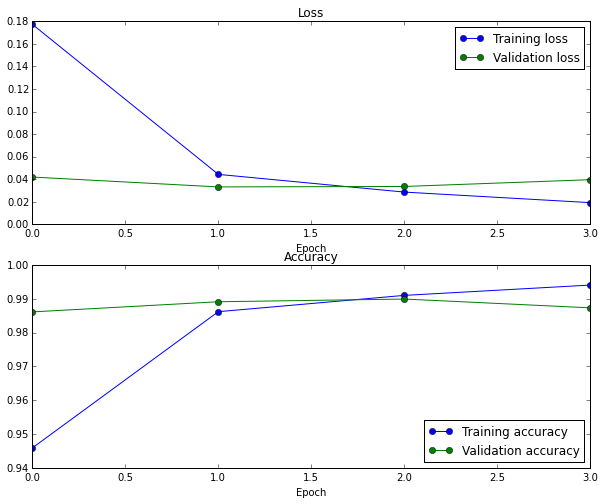

In [11]:
from IPython.display import Image
PATH = "plots/"
Image(filename = PATH + "t1_e3_p2.png", width=500, height=500)

In [ ]:
model.evaluate(X_test, Y_test)


10000/10000 [==============================] - 18s    
[0.034707620646443685, 0.98999999999999999]

Since we are using checkpointing, we can take the model that performs best on the validation set and evaluate it on the test set.


In [ ]:
plt.imshow(X_train_noise[0][0], cmap='gray')

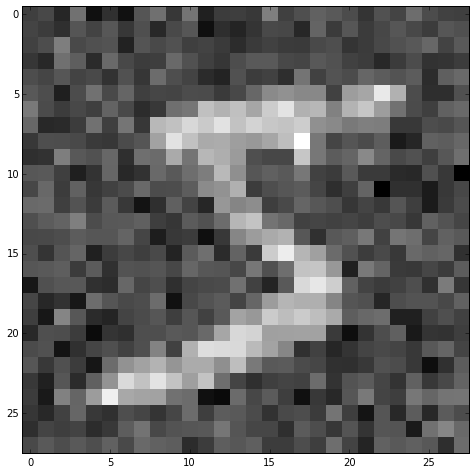

In [12]:
from IPython.display import Image
PATH = "plots/"
Image(filename = PATH + "t1_e3_p3.png", width=300, height=300)

In [ ]:
filters = model.layers[0].get_weights()[0]
print filters.shape

#Output :(32, 1, 3, 3)

In [ ]:
import numpy as np
filters = filters.reshape(4, 8, 3, 3)

f, axarr = plt.subplots(4, 8)
for i in range(4):
    for j in range(8):
        axarr[i, j].imshow(filters[i,j], cmap='gray')
        axarr[i,j].get_xaxis().set_visible(False)
        axarr[i,j].get_yaxis().set_visible(False)

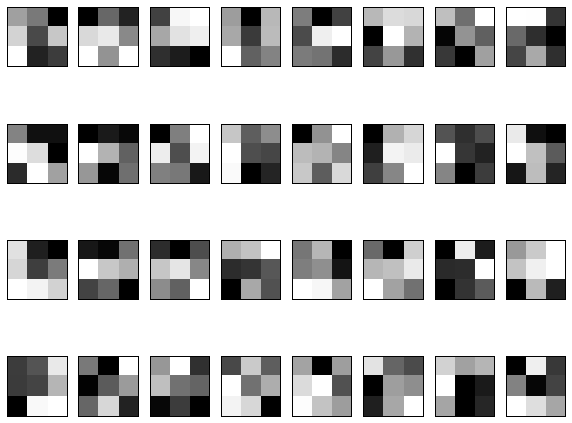

In [14]:
from IPython.display import Image
PATH = "plots/"
Image(filename = PATH + "t1_e3_p4.png", width=600, height=600)

In [ ]:
from keras import backend as K

get_1st_layer_output = K.function([model.layers[0].input],
                                  [model.layers[0].output])
get_2nd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])
get_4th_layer_output = K.function([model.layers[0].input],
                                  [model.layers[3].output])
output_noise = []
output_noise.append(get_1st_layer_output([X_test_noise[:1]])[0])
output_noise.append(get_2nd_layer_output([X_test_noise[:1]])[0])
output_noise.append(get_4th_layer_output([X_test_noise[:1]])[0])
output = []
output.append(get_1st_layer_output([X_test[:1]])[0])
output.append(get_2nd_layer_output([X_test[:1]])[0])
output.append(get_4th_layer_output([X_test[:1]])[0])

In [ ]:
for i in range(3):
    #plt.figure(figsize=(18, 8), dpi=100)
    print('Conv layer {}'.format(i+1))
    print('With Noise')
    out_n = output_noise[i]
    out_n = out_n.reshape(-1, 8, out_n.shape[-2], out_n.shape[-1])
    f, axarr = plt.subplots(out_n.shape[0], 8, figsize=(18, 8), dpi=100)
    for k in range(out_n.shape[0]):
        for j in range(8):
            axarr[k, j].imshow(out_n[k,j], cmap='gray')
            axarr[k,j].get_xaxis().set_visible(False)
            axarr[k,j].get_yaxis().set_visible(False)
    plt.show()
    out = output[i]
    out = out.reshape(out_n.shape)
    print('Without Noise')
    f, axarr = plt.subplots(out.shape[0], 8, figsize=(18, 8), dpi=100)
    for i in range(out.shape[0]):
        for j in range(8):
            axarr[i, j].imshow(out[i,j], cmap='gray')
            axarr[i,j].get_xaxis().set_visible(False)
            axarr[i,j].get_yaxis().set_visible(False)
    plt.show()


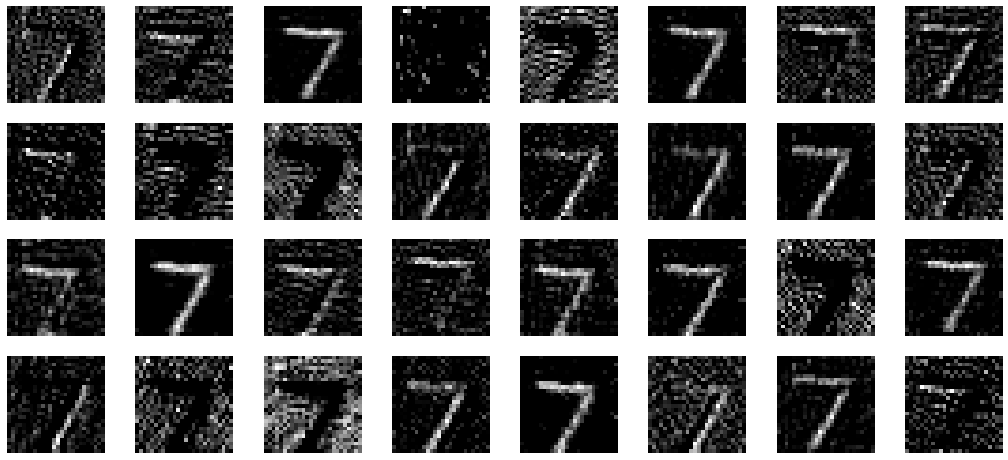

In [15]:
#Convolutional layer 1 with noise

from IPython.display import Image
PATH = "plots/"
Image(filename = PATH + "t1_e3_p5.png", width=600, height=600)

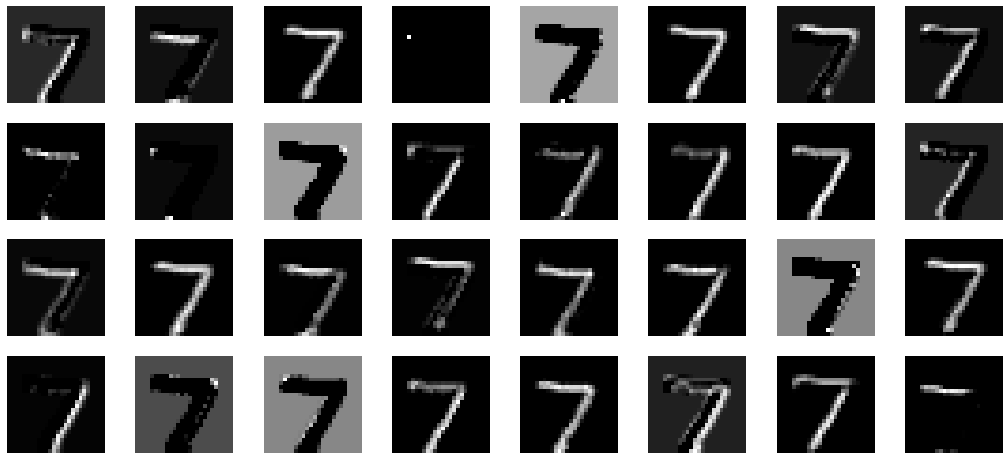

In [16]:
#Convolutional layer 1 without noise

from IPython.display import Image
PATH = "plots/"
Image(filename = PATH + "t1_e3_p6.png", width=600, height=600)

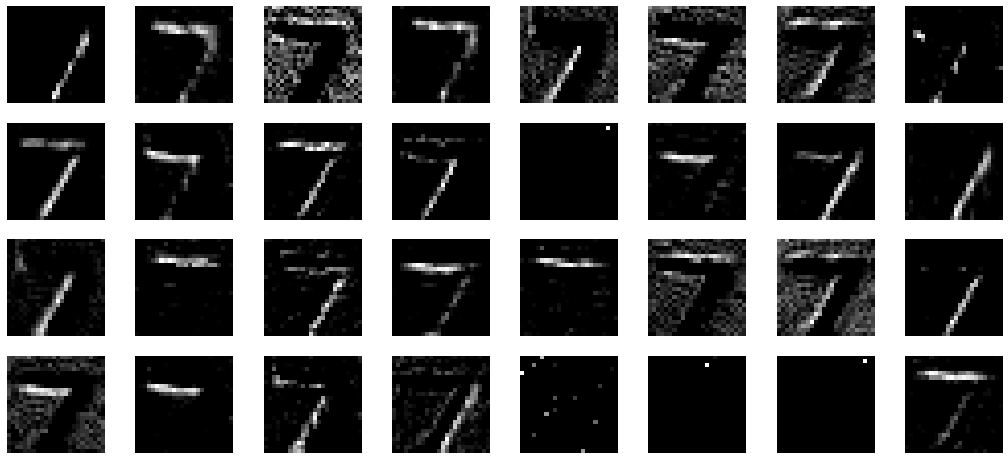

In [17]:
#Convolutional layer 2 with noise

from IPython.display import Image
PATH = "plots/"
Image(filename = PATH + "t1_e3_p7.png", width=600, height=600)

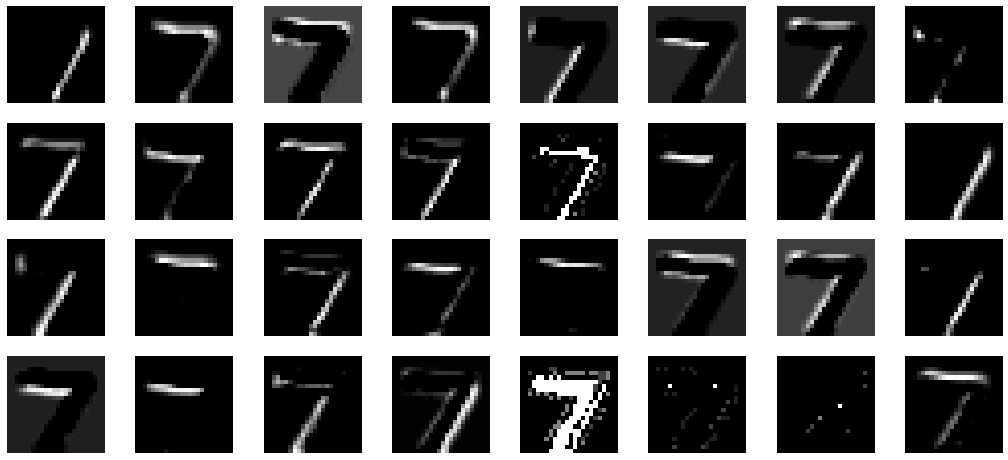

In [18]:
#Convolutional layer 2 without noise

from IPython.display import Image
PATH = "plots/"
Image(filename = PATH + "t1_e3_p8.png", width=600, height=600)

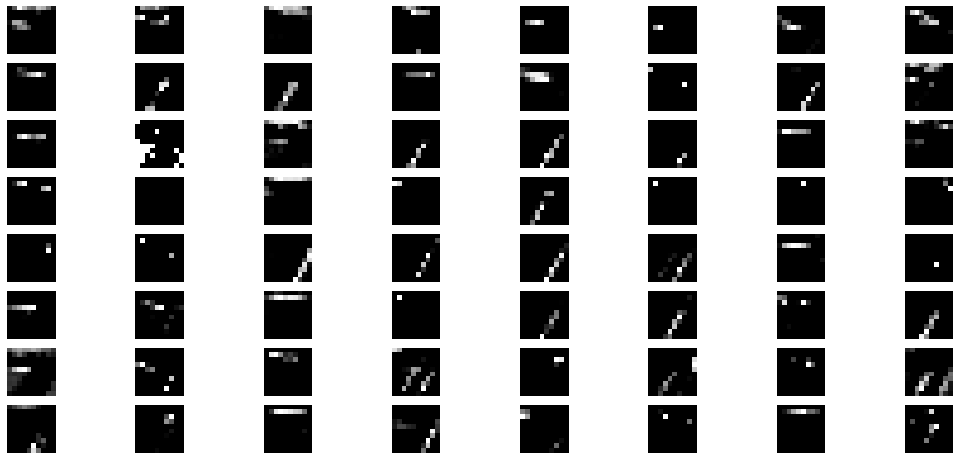

In [20]:
#Convolutional layer 3 with noise

from IPython.display import Image
PATH = "plots/"
Image(filename = PATH + "t1_e3_p9.png", width=1000, height=1000)

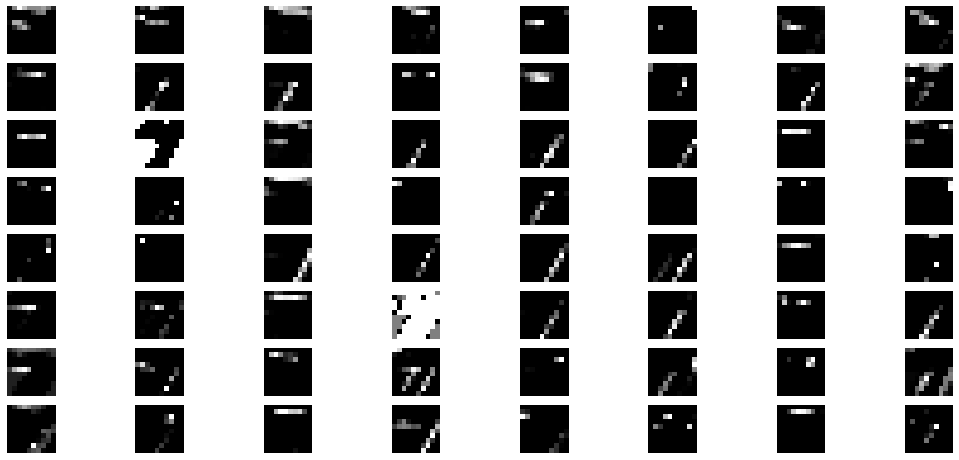

In [21]:
#Convolutional layer 3 without noise

from IPython.display import Image
PATH = "plots/"
Image(filename = PATH + "t1_e3_p10.png", width=1000, height=1000)

In [ ]:
for i in range(3):
    #plt.figure(figsize=(18, 8), dpi=100)
    print('Conv layer {}'.format(i+1))
    out_n = output_noise[i]
    out_n = out_n.reshape(-1, 8, out_n.shape[-2], out_n.shape[-1])
    out = output[i]
    out = out.reshape(out_n.shape)
    f, axarr = plt.subplots(out_n.shape[0], 8, figsize=(18, 18*(1*(i<2) + 2*(i==2))), dpi=100)
    for k in range(out_n.shape[0]):
        for j in range(8):
            axarr[k, j].imshow(np.concatenate((out_n[k,j],out[k,j]), axis=0), cmap='gray')
            axarr[k,j].get_xaxis().set_visible(False)
            axarr[k,j].get_yaxis().set_visible(False)
    plt.show()

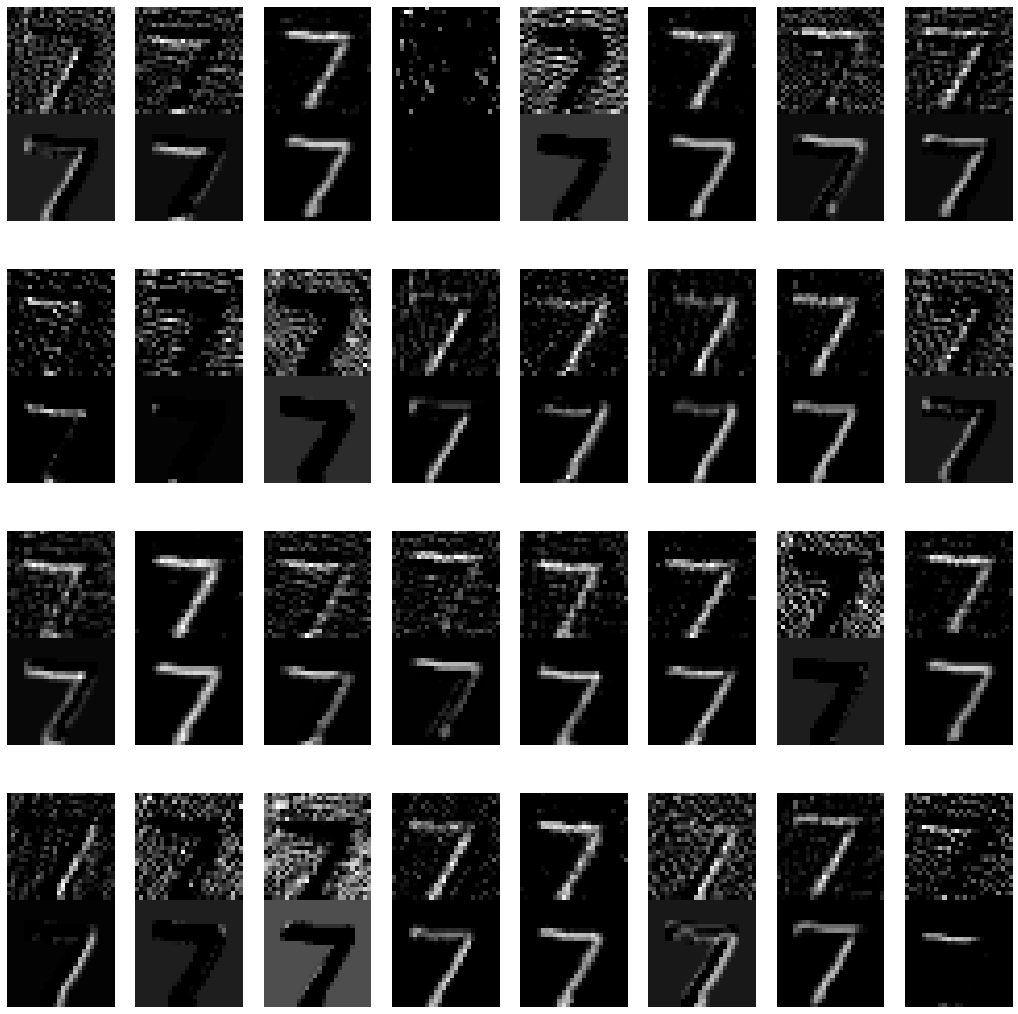

In [22]:
#Convolutional layer 1

from IPython.display import Image
PATH = "plots/"
Image(filename = PATH + "t1_e3_p11.png", width=1000, height=1000)

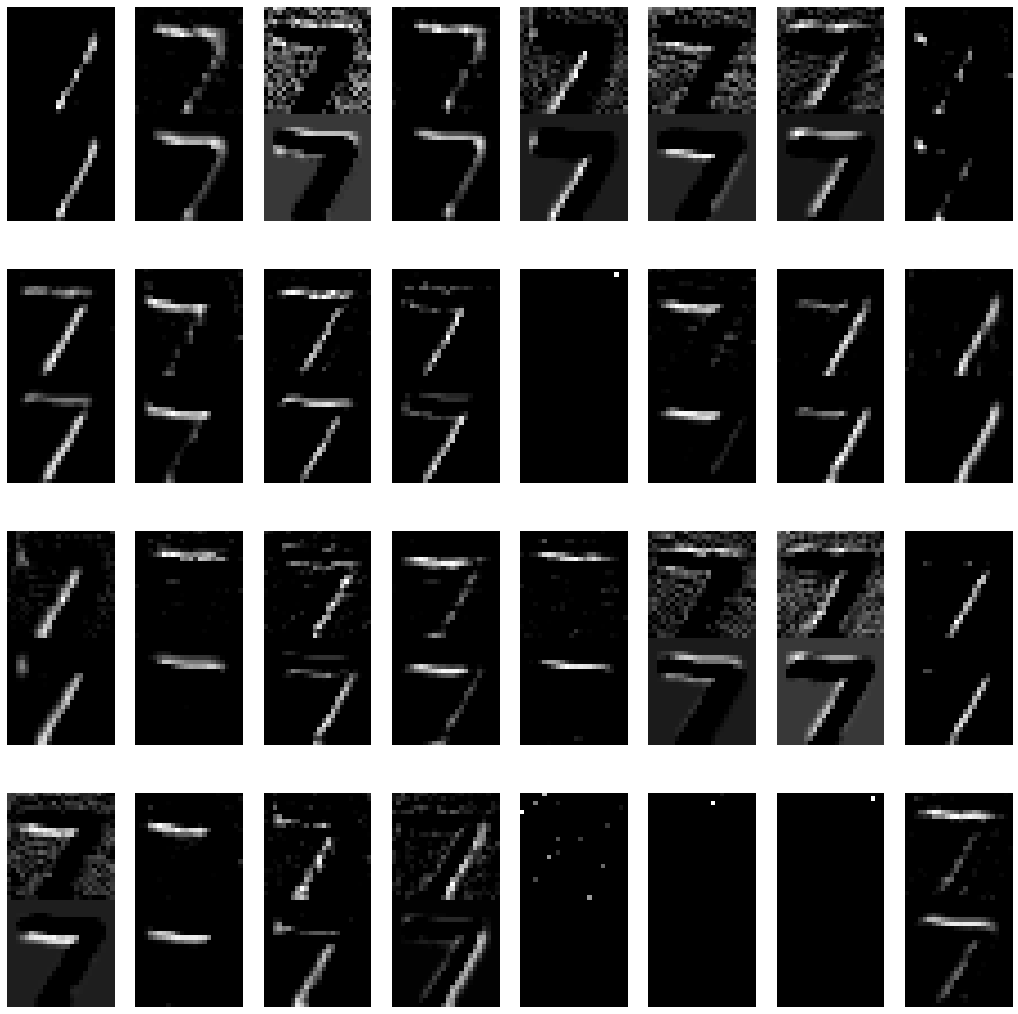

In [23]:
#Convolutional layer 2

from IPython.display import Image
PATH = "plots/"
Image(filename = PATH + "t1_e3_p12.png", width=1000, height=1000)

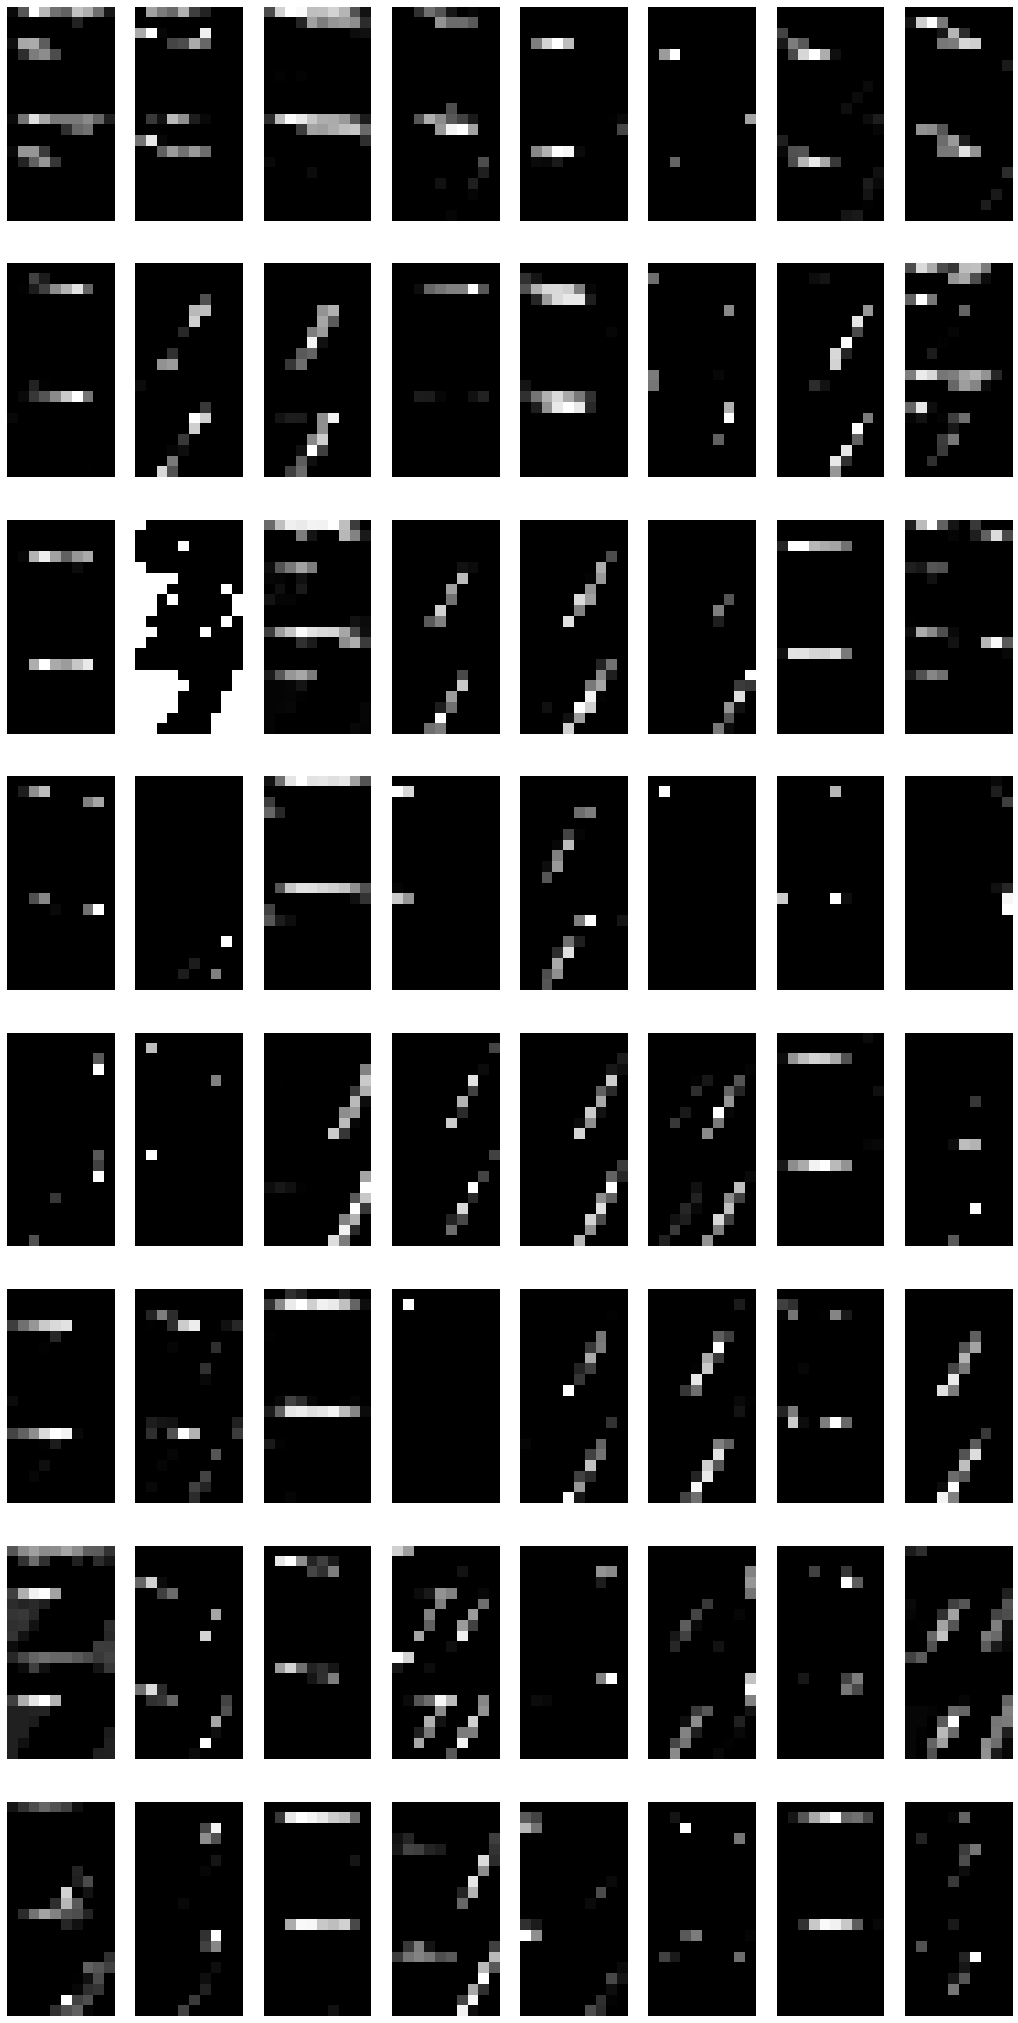

In [24]:
#Convolutional layer 3 

from IPython.display import Image
PATH = "plots/"
Image(filename = PATH + "t1_e3_p13.png", width=1000, height=1000)

## T-SNE

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
from keras import backend as K

get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[6].output])
layer_output = get_3rd_layer_output([X_test_noise])[0]
assert layer_output.shape[-1] == 128

layer_output.shape # output (10000, 128)

In [ ]:
X = layer_output[:3000,:]
model_tsne = TSNE(n_components=2, random_state=0)
Y = model_tsne.fit_transform(X)

In [ ]:
import pandas as pd
import seaborn as sns

data = {"x": [], "y": [], "cluster": []}
for i in range(len(X)):
    data["x"].append(Y[i][0])
    data["y"].append(Y[i][1])
    data["cluster"].append(y_test[i])
df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df,
           fit_reg=False, size=7,
           hue="cluster", legend=True)
plt.show()

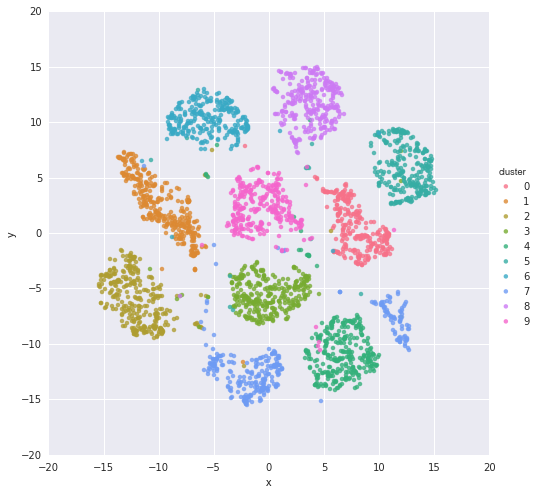

In [25]:
from IPython.display import Image
PATH = "plots/"
Image(filename = PATH + "t1_e3_p14.png", width=1000, height=1000)